# SUICIDE ANALYSIS on World Health Organization Dataset

Loretucci Lorenzo (1903794)

- Part 1: Exploratory Data Analysis 
- Part 2: Data Engineering
- Part 3: Machine Learning 
- Part 4: Bonus Part

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn import preprocessing
from sklearn import metrics

In [67]:
df = pd.read_csv('master.csv')

In [68]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


1. **HDI for year** --> Humand Development Index,  is a statistic composite index of life expectancy, education, and per capita income indicator which are used to rank countries into four tiers of human development.

2. **GDP_per_capita** --> is a metric that breaks down a country's economic output per person and is calculated by dividing the GDP of a country by its population.

3. **GDP_for_year** --> is a monetary measure of the market value of all the final goods and services produced in a specific time period.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
#rename some columns bacause there are some bugs....
df = df.rename(columns={' gdp_for_year ($) ' : 'gdp_per_year','gdp_per_capita ($)' : 'gdp_per_capita'})

# 1. EDA - Exploratory Data Analysis

### Gender Suicide Analysis

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64


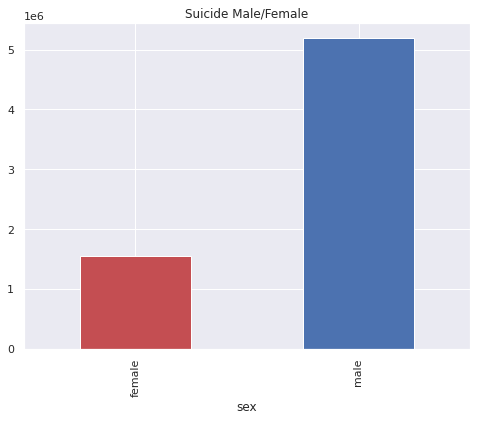

In [6]:
male_famale = df.groupby('sex')['suicides_no'].sum()
print(male_famale)
male_famale.plot.bar(figsize = (8, 6 ), title = 'Suicide Male/Female' ,color = ['r', 'b'])

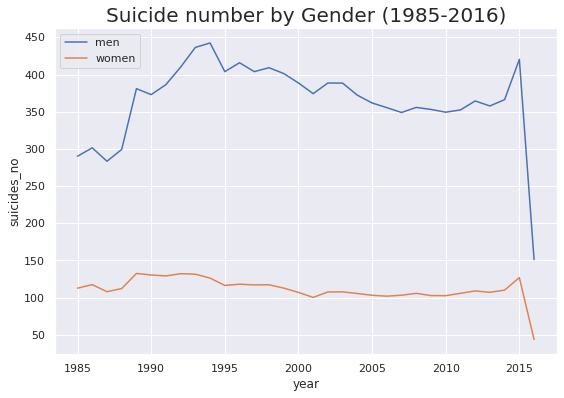

In [7]:
#Cheking the difference between men and women over the years
plt.figure(figsize=(9,6))
plt.title('Suicide number by Gender (1985-2016)', fontsize=20)
data_men = df[df['sex'] == 'male']
data_women = df[df['sex'] == 'female']
sns.lineplot(data_men.year, data_men.suicides_no, ci = None)
sns.lineplot(data_women.year, data_women.suicides_no, ci = None)
plt.legend(['men','women'])
plt.show()

### Analysis for Age and Generation

<ipython-input-8-26df380f68b1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_age = df.groupby(['year', 'age'])['suicides_no', 'population'].sum()


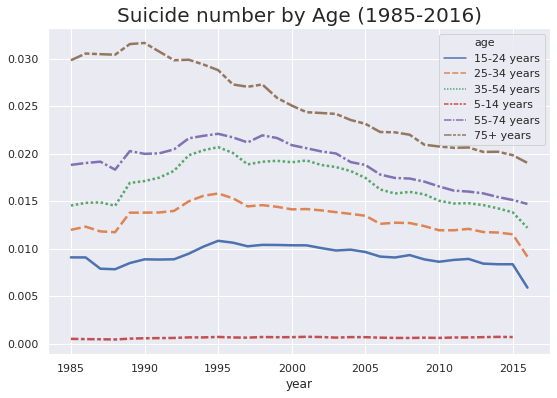

In [8]:
data_age = df.groupby(['year', 'age'])['suicides_no', 'population'].sum()
data_reset = data_age.copy().reset_index()
plt.figure(figsize=(9,6))
plt.title('Suicide number by Age (1985-2016)', fontsize=20)
sns.lineplot('year', data_reset.suicides_no*100/data_reset['population'], hue='age',
            data=data_reset, linewidth=2.5, style='age')
plt.show()

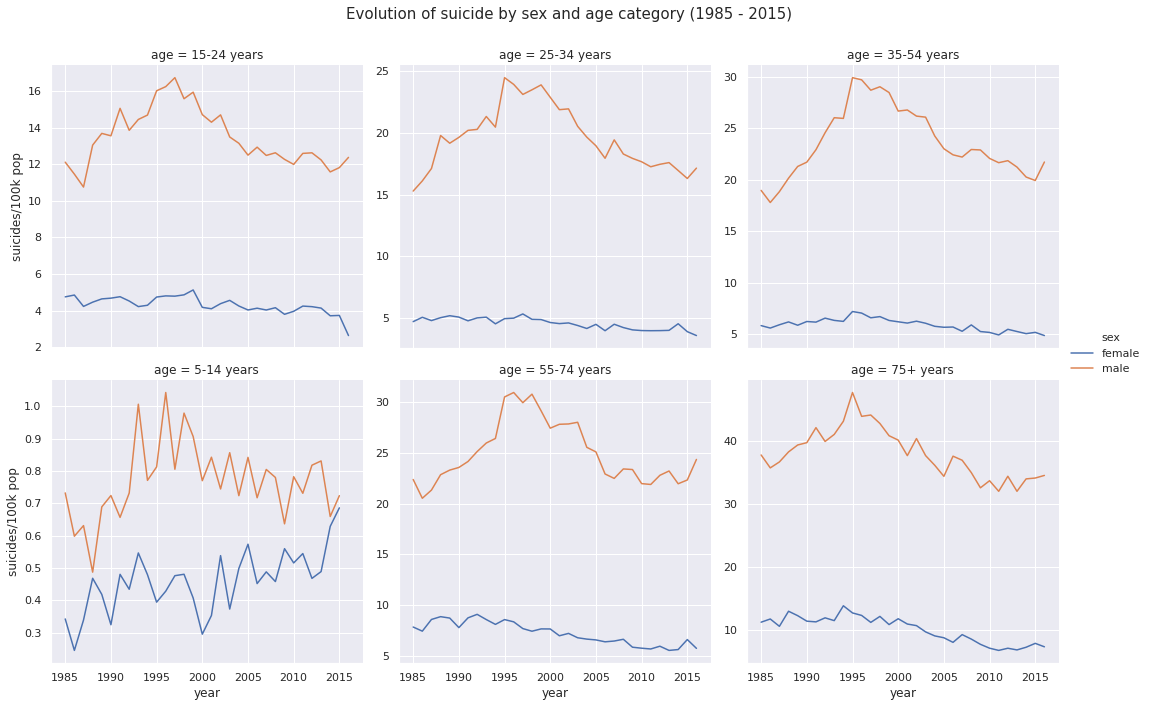

In [9]:
df2 = df.groupby(["year", "sex", "age"]).agg("mean").reset_index()

sns.relplot(x = "year", y = "suicides/100k pop", 
            hue = "sex", col = "age", col_wrap = 3, data = df2, 
            facet_kws=dict(sharey=False), kind = "line")

#plt.xlim("1985", "2015")
plt.subplots_adjust(top = 0.9)
plt.suptitle("Evolution of suicide by sex and age category (1985 - 2015)", size=15);

In [10]:
data_generation =  df.groupby('generation', as_index=False)['suicides_no'].sum().sort_values(by='suicides_no', ascending=False)
print('Which Generation are present in the dataset?')
data_generation

Which Generation are present in the dataset?


,generation,suicides_no
0,Boomers,2284498
5,Silent,1781744
2,Generation X,1532804
4,Millenials,623459
1,G.I. Generation,510009
3,Generation Z,15906


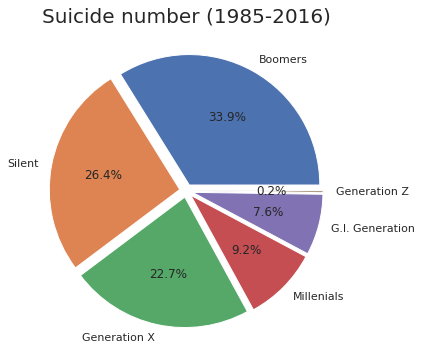

In [11]:
plt.figure(figsize=(6,6))
plt.title('Suicide number (1985-2016)', fontsize=20)
plt.pie(data_generation.suicides_no, explode =(0.05, 0.05, 0.05, 0.05, 0.05, 0.05), labels=data_generation.generation, autopct='%1.1f%%')
plt.show()

### World Suicide Analysis

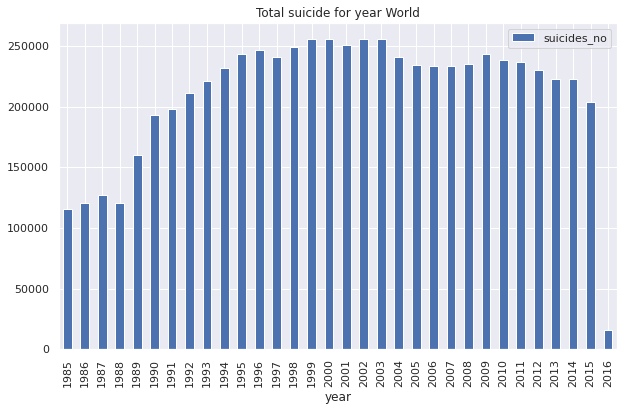

In [12]:
df.groupby('year')['suicides_no'].sum().plot.bar(figsize = (10,6), title ='Total suicide for year World', legend =True )

In [13]:
#Creating a col % of population comited suicide
df['suicides/pop'] = df['suicides_no']*100/df['population']
data_suicides_country = df.groupby('country', as_index=False)['suicides/pop'].mean().sort_values(by='suicides/pop', ascending=False)

data_suicides_country

,country,suicides/pop
52,Lithuania,0.040415
87,Sri Lanka,0.035295
75,Russian Federation,0.034892
40,Hungary,0.032762
11,Belarus,0.031076
...,...,...
65,Oman,0.000736
1,Antigua and Barbuda,0.000553
45,Jamaica,0.000522
76,Saint Kitts and Nevis,0.000000


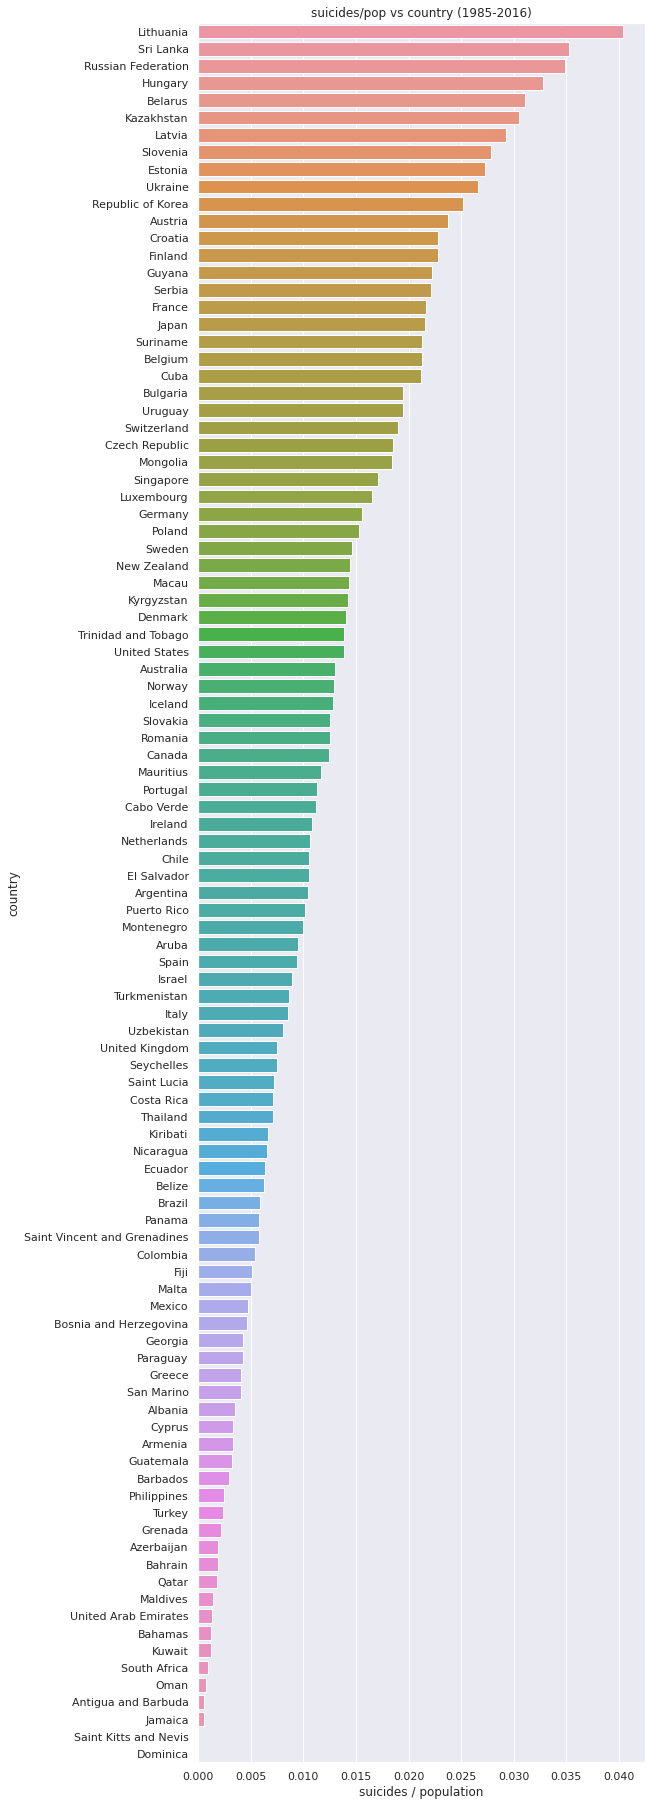

In [14]:
plt.figure(figsize=(8,32))
sns.barplot(y=data_suicides_country.country, x=data_suicides_country['suicides/pop'])
plt.xlabel("suicides / population")
plt.ylabel("country")
plt.title("suicides/pop vs country (1985-2016)")
plt.show()

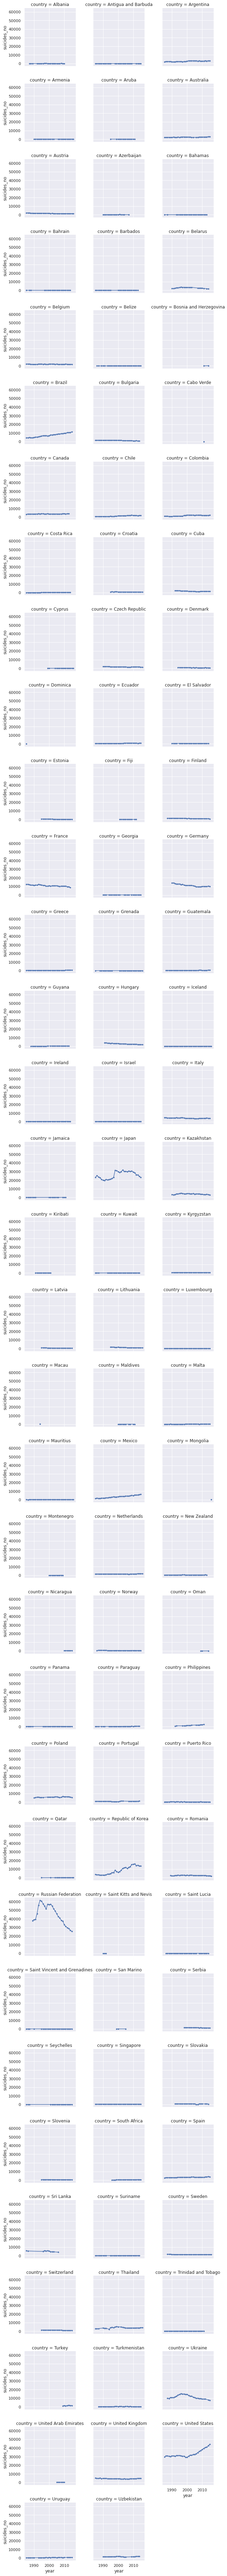

In [15]:
g = sns.FacetGrid(df.groupby(['country','year']).suicides_no.sum().reset_index() , col = 'country',col_wrap = 3)
g.map(plt.plot , 'year','suicides_no',marker = '.')
plt.show()

##### Look's like some country have an hight suicide over the years.....let's see.

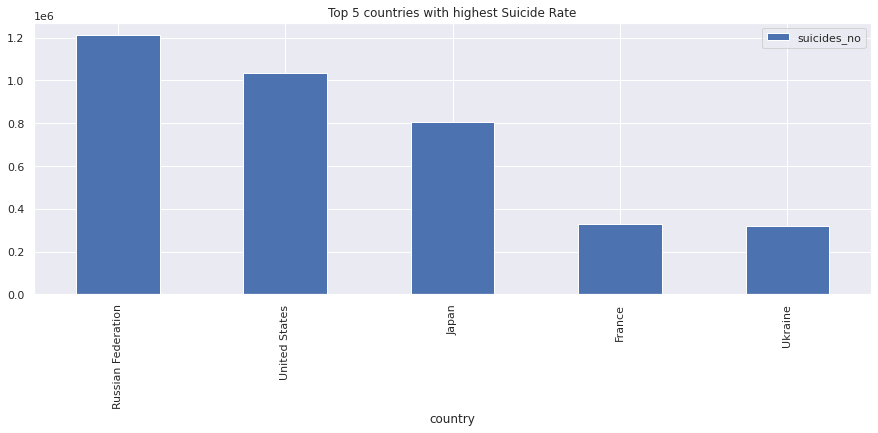

In [16]:
top_data=df[['country','suicides_no']].groupby(['country']).sum()
top_data = top_data.reset_index().sort_values(by='suicides_no', ascending=False)
top_5 = top_data[:5]
top_5.plot(kind='bar',figsize=(15,5),title="Top 5 countries with highest Suicide Rate",x='country',y='suicides_no')

In [17]:
# Create a function that shows yearly suicide in a country
def country_yearly_suicide(country):
    temp = df[df['country']==country]
    chart = sns.catplot(x='year',y='suicides_no',kind="bar",data=temp,height=3, aspect=9/4)
    plt.title(country)
    chart.set_xticklabels(rotation=90)

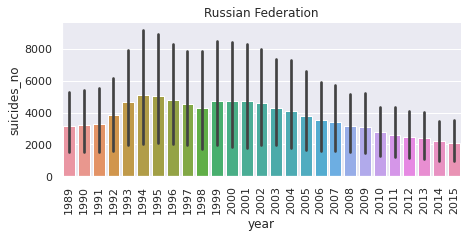

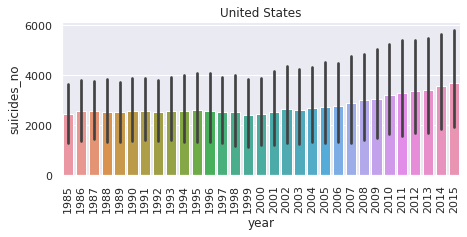

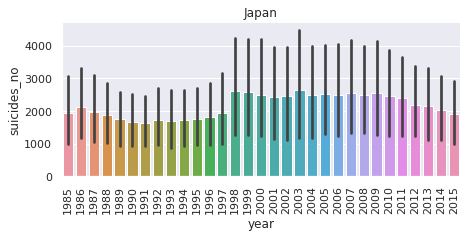

In [18]:
#plot the yaerly suicide for top 3 country....
country_yearly_suicide('Russian Federation')
country_yearly_suicide('United States')
country_yearly_suicide('Japan')


In [19]:
#Create a function that shows gdp vs suicides in a country.
#The gdp capita has been divided by 100 for scaling.
def country_gdp_suicide(country):

    temp = df.groupby(['country-year','country']).sum()
    temp.reset_index(level=['country-year','country'],inplace=True)
    ptemp = temp[temp['country']==country]
    ptemp['gdp_per_capita ($)'] = ptemp['gdp_per_capita']/100
    d = ptemp['country-year']
    d = [t[-4:] for t in d]
    ptemp['country-year'] = d
    plt.figure(figsize=(20,5))
    plt.xlabel('year')
    plt.ylabel('gdp_per_capita($)/100')
    ax = plt.gca()
    
    plt.grid(color='white',linestyle='dotted',linewidth=0.5)
    plt.plot(ptemp['country-year'],ptemp['suicides_no'],marker='o',label='suicides')
    plt.plot(ptemp['country-year'],ptemp['gdp_per_capita ($)'],marker='^',label='gdp_per_capita')
    plt.title(country)
    plt.legend()

<ipython-input-19-755082e235dc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptemp['gdp_per_capita ($)'] = ptemp['gdp_per_capita']/100
<ipython-input-19-755082e235dc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptemp['country-year'] = d
<ipython-input-19-755082e235dc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

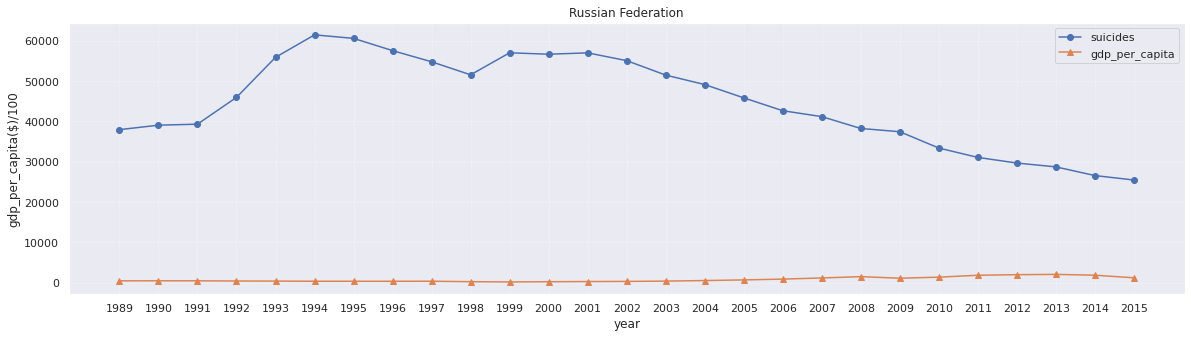

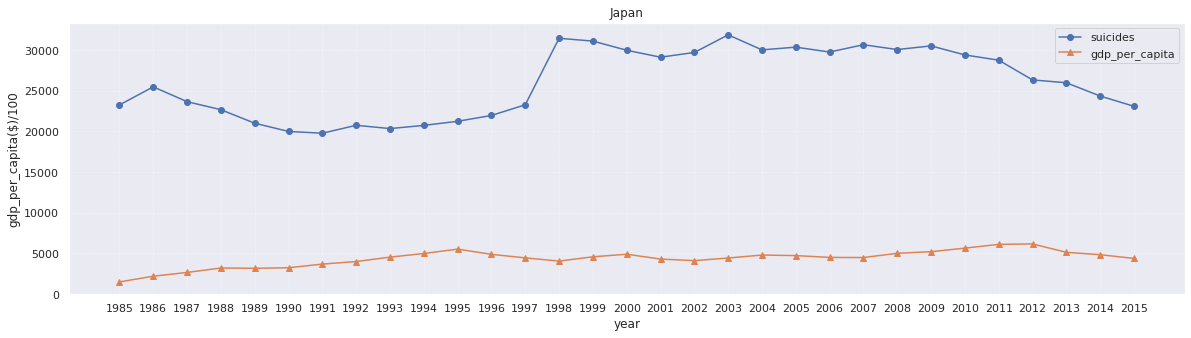

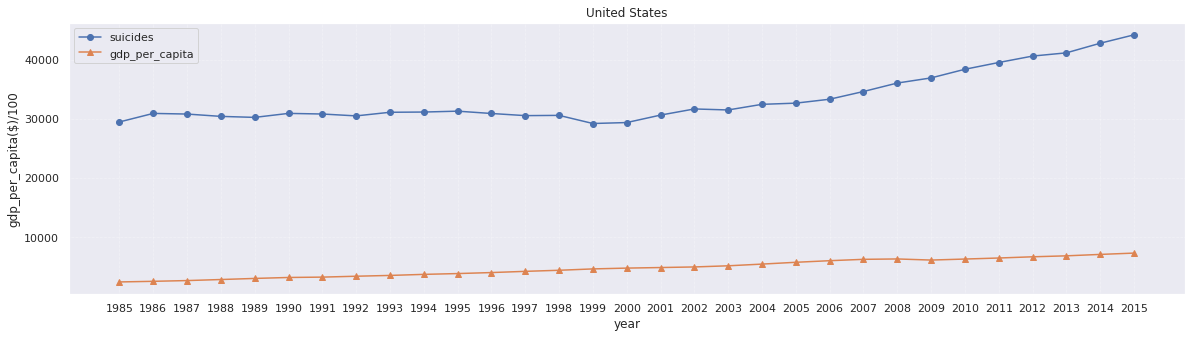

In [20]:
#plot gdp/suicede for top 3 countries
country_gdp_suicide('Russian Federation')
country_gdp_suicide('Japan')
country_gdp_suicide('United States')

## Correlation between variable

In [21]:
# is there any correlation beteween variables?
df.corr('pearson').style.background_gradient()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,suicides/pop
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134,-0.039038
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330,0.306603
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510,0.008283
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785,1.000000
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228,0.074275
gdp_per_capita,0.339134,0.061330,0.081510,0.001785,0.771228,1.000000,0.001783
suicides/pop,-0.039038,0.306603,0.008283,1.000000,0.074275,0.001783,1.000000


# 2. Data Engineering

From the above is clear that some country have lots of miss values for che column **HDI for year**.
Let's see more information...

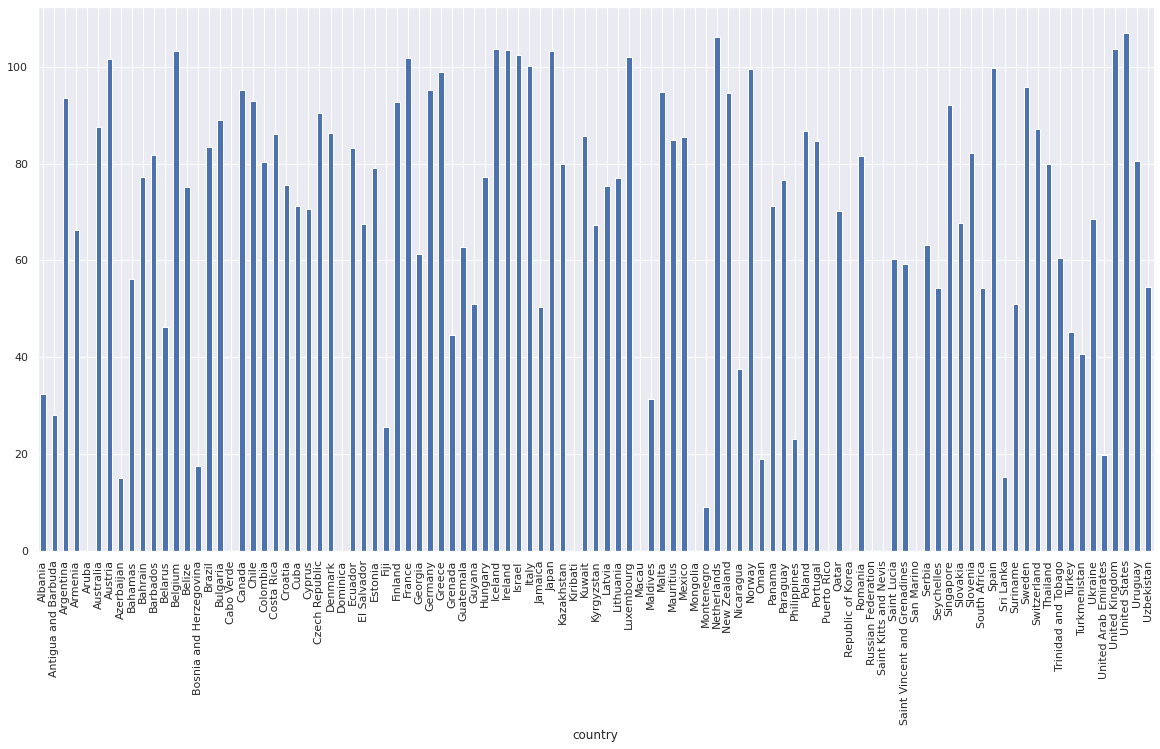

In [22]:
df.groupby('country')['HDI for year'].sum().plot(kind = 'bar' ,figsize = (20,10))

In [23]:
dff = df


#### More than 10 country don't have any HDI vlaues or just a bit. For these I decide to set a Treshold that can cut from the dataset all the country with less than a specific values. For example let's use 40 as th.  To be clear all country have more or less 320/370 rows in total. 

In [24]:
th = 40.0 #select threshold
dd = dff.groupby('country')['HDI for year'].sum()   

plus_country = []
minus_country = []
for key, ele in dict(dd).items():
    if ele > th:
        plus_country.append(key)
    else: 
        minus_country.append(key)
        

print(f'Total number of country now are: {len(plus_country)}\n')
print(f'Total number of country removed are: {len(minus_country)}')

Total number of country now are: 78

Total number of country removed are: 23


In [25]:
dff = dff[dff['country'].isin(plus_country)]
dff['HDI for year'].fillna(0, inplace=True)

/home/lorenzo/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [26]:
del dff['country-year']

Now tha we remove some country lets use the label encoding technic to transform all the categories values into numeric.....

In [27]:
country = list(dff['country'].unique())
gen = list(dff['generation'].unique())
age=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']
sex = list(dff['sex'].unique())

print('JUST A LITLE RECAP FOR ALL THE CATEGORICAL VALUES: \n')
print(f'How many generation are there in the columns Generation? {len(gen)}, {gen}\n')
print(f'How many ages are there in the columns Age? {len(age)}, {age}\n')
print(f'How many sex are there in the columns Sex? {len(sex)}, {sex}')

JUST A LITLE RECAP FOR ALL THE CATEGORICAL VALUES: 

How many generation are there in the columns Generation? 6, ['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z']

How many ages are there in the columns Age? 6, ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

How many sex are there in the columns Sex? 2, ['male', 'female']


In [28]:
def return_values(values, columns):
    v = 0
    for el in values:
        dff[columns].replace(el, v , inplace = True)
        v+= 1
    return dff[columns]
    

In [29]:
return_values(age, 'age')
return_values(sex, 'sex')
return_values(country, 'country')
return_values(gen, 'generation')

/home/lorenzo/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


588      0
589      0
590      1
591      0
592      2
        ..
27815    3
27816    1
27817    5
27818    5
27819    2
Name: generation, Length: 24666, dtype: int64

In [30]:
# GDP for year is a object so i will transfor gdp_per_year from str to int
dff['gdp_per_year'] = dff['gdp_per_year'].str.replace(',','').astype('int64')

<ipython-input-30-44b910858615>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['gdp_per_year'] = dff['gdp_per_year'].str.replace(',','').astype('int64')


In [31]:
#log transformations
dff['gdp_per_year_log'] = np.where(dff['gdp_per_year'] != 0, np.log(dff['gdp_per_year']), 0) 
del dff['gdp_per_year']

dff['log_pop'] = np.where(dff['population'] != 0, np.log(dff['population']), 0)
del dff['population']

dff['log_suicide'] = np.where(dff['suicides_no'] != 0, np.log(dff['suicides_no']), 0)
del dff['suicides_no']

<ipython-input-31-bfeea2b4c172>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['gdp_per_year_log'] = np.where(dff['gdp_per_year'] != 0, np.log(dff['gdp_per_year']), 0)
<ipython-input-31-bfeea2b4c172>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['log_pop'] = np.where(dff['population'] != 0, np.log(dff['population']), 0)
/home/lorenzo/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwa

# 3. Machine Learning 

I decide to create _two_ different task to solve different problems: **Regression** and **Classification**.


#### 3.1 Regression 

In [32]:
X_df = dff.drop(['log_suicide'],1 )
y_df=dff['log_suicide']

In [33]:
print(X_df.shape,y_df.shape)

(24666, 11) (24666,)


In [34]:
X_train,X_test,y_train,y_test=train_test_split(X_df,y_df,test_size=0.3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(17266, 11) (7400, 11) (17266,) (7400,)


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import*

In [36]:
model=linear_model.LinearRegression()
model.fit(X_train,y_train)
print('accuracy of linearregression : ',model.score(X_train,y_train))

y_pr1=model.predict(X_test)
print('MSE of the data using Linear Regression : ',mean_squared_error(y_test,y_pr1))
print('r-squared error of the data using Linear Regression : ',1-r2_score(y_test,y_pr1))
print('RMSE of the data using Linear Regression : ',np.sqrt(mean_squared_error(y_test,y_pr1)))

accuracy of linearregression :  0.840642985553449
MSE of the data using Linear Regression :  0.8306349113168439
r-squared error of the data using Linear Regression :  0.16145003636729793
RMSE of the data using Linear Regression :  0.9113917441566189


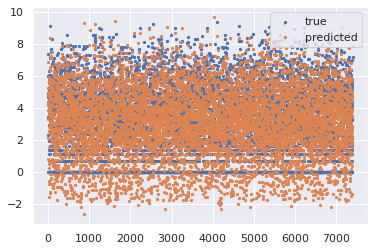

In [37]:
a=np.arange(1,len(y_test)+1,1)

plt.scatter(a,y_test,label='true',s=5)
plt.legend()
plt.scatter(a,y_pr1,label='predicted',s=5)
plt.legend()
plt.show()


In [38]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
print('accuracy of randomforestregression : ',model.score(X_train,y_train))
y_pr1=model.predict(X_test)
print('MSE of the data using randomforestregression : ',mean_squared_error(y_test,y_pr1))
print('r-squared error of the data using randomforestregression : ',1-r2_score(y_test,y_pr1))
print('RMSE of the data using randomforestregression : ',np.sqrt(mean_squared_error(y_test,y_pr1)))

accuracy of randomforestregression :  0.9999753932667983
MSE of the data using randomforestregression :  0.0010152334506262147
r-squared error of the data using randomforestregression :  0.00019733034970204066
RMSE of the data using randomforestregression :  0.03186272823576498


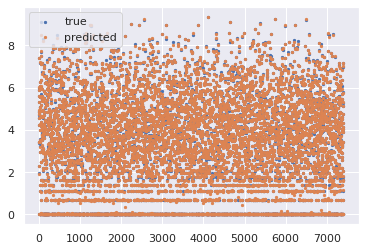

In [39]:
plt.scatter(a,y_test,label='true',s=5)
plt.legend()
plt.scatter(a,y_pr1,label='predicted',s=5)
plt.legend()
plt.show()

#### 3.2 Classification

I create a new columns _fatality_rate_ for this specific classification task.

In [55]:
dff2 = dff
dff2

,country,year,sex,age,suicides/100k pop,HDI for year,gdp_per_capita,generation,suicides/pop,gdp_per_year_log,log_pop,log_suicide,fatality_rate
588,0,1985,0,5,55.65,0.694,3264,0,0.055647,25.205326,12.802158,5.308268,0
589,0,1985,0,4,24.29,0.694,3264,0,0.024286,25.205326,14.507157,6.184149,0
590,0,1985,0,3,12.37,0.694,3264,1,0.012372,25.205326,15.023366,6.025866,1
591,0,1985,1,4,9.11,0.694,3264,0,0.009115,25.205326,14.650157,5.347108,1
592,0,1985,0,2,7.92,0.694,3264,2,0.007922,25.205326,14.619394,5.176150,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,77,2014,1,3,2.96,0.675,2309,3,0.002955,24.867465,15.102215,4.672829,1
27816,77,2014,1,5,2.58,0.675,2309,1,0.002583,24.867465,12.761293,2.197225,1
27817,77,2014,0,0,2.17,0.675,2309,5,0.002172,24.867465,14.831523,4.094345,1
27818,77,2014,1,0,1.67,0.675,2309,5,0.001672,24.867465,14.783103,3.784190,1


In [51]:
#create a now fatality rate columns where if the suicides is > of the itsealf mean apply 0 if < 1
dff2['fatality_rate']=np.where(dff2['suicides/100k pop']>dff2['suicides/100k pop'].mean(),0,1)

<ipython-input-51-09ed53488a98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff2['fatality_rate']=np.where(dff2['suicides/100k pop']>dff2['suicides/100k pop'].mean(),0,1)


In [59]:
X_class = np.array(dff2.drop(['fatality_rate', 'suicides/100k pop'], 1))

y_class = np.array(dff2.fatality_rate)
X_train_class,X_test_class,y_train_class,y_test_class=train_test_split(X_class,y_class,test_size=0.25,random_state=42)

#Encoing labels for continous and multi class output
label_enc=preprocessing.LabelEncoder()
trs=label_enc.fit_transform(y_train_class)


print("Shape of x_train: ",X_train_class.shape)
print("Shape of y_train: ",y_train_class.shape)
print("Shape of x_test: ",X_test_class.shape)
print("Shape of y_test: ",y_test_class.shape)

Shape of x_train:  (18499, 11)
Shape of y_train:  (18499,)
Shape of x_test:  (6167, 11)
Shape of y_test:  (6167,)


In [53]:
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train_class,y_train_class)

print(f'Logistic Regression : {accuracy_score(y_test_class,logreg.predict(X_test_class))}\n')

print(classification_report(logreg.predict(X_test_class),y_test_class))

Logistic Regression : 0.8169288146586671

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1872
           1       0.88      0.85      0.87      4295

    accuracy                           0.82      6167
   macro avg       0.78      0.79      0.79      6167
weighted avg       0.82      0.82      0.82      6167



/home/lorenzo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
#checking RandomForestClassifier Model and accuracy
from sklearn.ensemble import RandomForestClassifier

mod=RandomForestClassifier(n_estimators=50,random_state=123)
mod.fit(X_train_class,trs)
mod.predict(X_test_class)
print(f"Random Forest accuracy is: {accuracy_score(y_test_class,mod.predict(X_test_class))}\n ")
#classification report RandomForest

print(classification_report(mod.predict(X_test_class),y_test_class))

Random Forest accuracy is: 0.9998378466028863
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1992
           1       1.00      1.00      1.00      4175

    accuracy                           1.00      6167
   macro avg       1.00      1.00      1.00      6167
weighted avg       1.00      1.00      1.00      6167



# Bonus Part -- Pycaret

For Classification 

In [62]:
from pycaret.classification import *
exp = setup(data = dff, target = 'fatality_rate', session_id=123)

,Description,Value
0,session_id,123
1,Target,fatality_rate
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(24666, 13)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [63]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0190
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1700
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0200
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2830
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4310
catboost,CatBoost Classifier,0.9993,1.0000,0.9998,0.9991,0.9995,0.9984,0.9984,7.1080
lr,Logistic Regression,0.9992,1.0000,0.9992,0.9996,0.9994,0.9981,0.9981,0.3160
lightgbm,Light Gradient Boosting Machine,0.9987,1.0000,0.9992,0.9988,0.9990,0.9969,0.9969,0.8150
et,Extra Trees Classifier,0.9845,0.9989,0.9893,0.9878,0.9886,0.9644,0.9644,0.1700
nb,Naive Bayes,0.9635,0.9965,0.9562,0.9898,0.9727,0.9178,0.9191,0.0170


For regression

In [64]:
from pycaret.regression import * 
#intialize the setup (in Notebook env)
exp_reg = setup(dff, target = 'log_suicide')

,Description,Value
0,session_id,7239
1,Target,log_suicide
2,Original Data,"(24666, 13)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(17266, 21)"


In [65]:
best_model2 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0163,0.0011,0.0323,0.9998,0.0132,0.0069,0.9700
et,Extra Trees Regressor,0.0147,0.0008,0.0281,0.9998,0.0128,0.0062,0.7020
catboost,CatBoost Regressor,0.0213,0.0015,0.0384,0.9997,0.0212,0.0096,4.8960
xgboost,Extreme Gradient Boosting,0.0373,0.0031,0.0559,0.9994,0.0195,0.0159,1.6580
lightgbm,Light Gradient Boosting Machine,0.0383,0.0035,0.0588,0.9993,0.0265,0.0172,1.7500
dt,Decision Tree Regressor,0.0345,0.0050,0.0701,0.9990,0.0267,0.0127,0.0300
gbr,Gradient Boosting Regressor,0.0915,0.0160,0.1263,0.9969,0.0728,0.0346,0.3960
ada,AdaBoost Regressor,0.3488,0.1869,0.4319,0.9632,0.2071,0.1141,0.2470
lr,Linear Regression,0.5204,0.5109,0.7146,0.8994,0.3337,0.1851,0.0160
ridge,Ridge Regression,0.5204,0.5109,0.7146,0.8994,0.3337,0.1851,0.0150


Thanks